#### Problem Number: 7889551776442471541

Maximize:$-15x + -10y$

Subject to: $$-10 <= x <= 10$$ $$-10 <= y <= 10$$ $$-17x + -18y <= 0$$ $$-4x + 6y <= 50$$ $$19x + -18y <= 60$$
 
Know: Based on the problem presented, it seems that we have a optimization problem.

Objective Function: $-15x - 10y$

Constraints:$-17x - 18y <= 0$, $-4x + 6y <= 50$, and $19x - 18y <= 60$

Decision Variables Bounds: x and y bounded by $-10 <= x <= 10$ and $-10 <= y <= 10$.

Assesment: Since the objective function and contraints in the problem are linear, my inital thought is to apply linear programming.

#### Write contraints in standard form

$-17x - 18y <= 0$ becomes $17x + 18y >= 0$

$-4x + 6y <= 50$ becomes $4x - 6y >= -50$

$19x - 18y <= 60$ becomes $19x + 18y <= 60$

In [45]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function to minimize (-15x - 10y)
c = np.array([-15, -10])

# Coefficients of the inequality constraints (Ax <= b)
A = np.array([
    [17, 18],
    [4, -6],
    [19, 18]
])

# Right-hand side values of the inequality constraints
b = np.array([0, -50, 60])

# Bounds for x and y
x_bounds = (-10, 10)
y_bounds = (-10, 10)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])

if res.success:
    print("Optimal values: x =", res.x[0], ", y =", res.x[1])
else:
    print("No solution found.")


Optimal values: x = -5.172413793103448 , y = 4.885057471264368


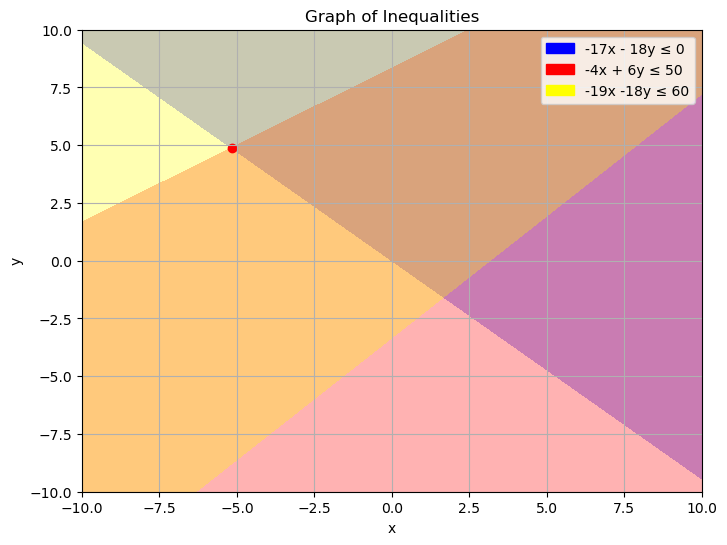

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Specify a font that supports the required characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Define a range of values for x and y
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

# Create a grid of points (x, y)
x, y = np.meshgrid(x, y)

# Define the first and second inequalities as functions
inequality1 = -17 * x - 18 * y
inequality2 = -4 * x + 6 * y - 50
inequality3 = 19 * x + -18 * y - 60

# Create contour plots for both inequalities on the same graph
plt.figure(figsize=(8, 6))
contour1 = plt.contourf(x, y, inequality1, levels=[-np.inf, 0], colors='blue', alpha=0.3)
contour2 = plt.contourf(x, y, inequality2, levels=[-np.inf, 0], colors='red', alpha=0.3)
contour3 = plt.contourf(x, y, inequality3, levels=[-np.inf, 0], colors='yellow', alpha=0.3)

# Create legend patches for the contours
blue_patch = mpatches.Patch(color='blue', label='-17x - 18y ≤ 0')
red_patch = mpatches.Patch(color='red', label='-4x + 6y ≤ 50')
yellow_patch = mpatches.Patch(color='yellow', label='-19x -18y ≤ 60')

# Plot a point with given coordinates (x, y)
point_x = -5.172413793103448  # X-coordinate of the point
point_y = 4.885057471264368  # Y-coordinate of the point
plt.scatter(point_x, point_y, color='red', marker='o', label='Maximum')

# Add a legend with the patches
plt.legend(handles=[blue_patch, red_patch, yellow_patch])

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

plt.title('Graph of Inequalities')
plt.grid(True)
plt.show()